<a href="https://colab.research.google.com/github/seeedata/OUTTA-AI-BOOTCAMP/blob/main/0711%20Preprocessing_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

#임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px

#데이터 불러오기

In [ ]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- MedInc : median income in **block group**
- HouseAge : median house age in **block group**
- AveRooms : average number of rooms per **household**
- AveBedrms : average number of bedrooms per **household**
- Population : **block group** population
- AveOccup : average number of **household** members
- Latitude : a measure of how far north a house is
- Longitude : a measure of how far west a house is
- MedHouseVal : median house value for California districts (단위: $100,000)

❗block group은 미국 인구조사의 최소 인구 단위로서, 보통 600~3000명으로 구성된다.

❗household는 한 집에 거주하는 집단을 의미한다.

#데이터 탐색

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


모든 9개 열이 숫자형 변수이고, 결측치가 없다.

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


AveRooms, AveBedrms의 경우, 최댓값이 각각 141과 34인데, 평균과 비교했을 때 지나치게 큰 값이다. 이를 조정해야 한다.

AveOccup의 평균이 3명인 것에 비해, 최댓값은 1243명으로 지나치게 크다. 마찬가지로, 이를 조정해야 한다.


#결측치 확인

In [ ]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#이상치 탐지

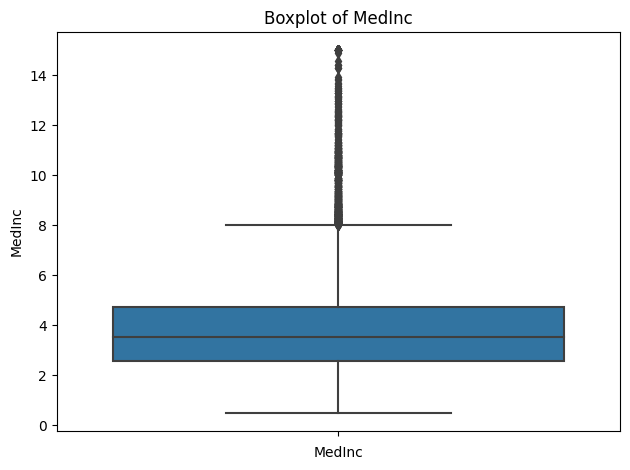

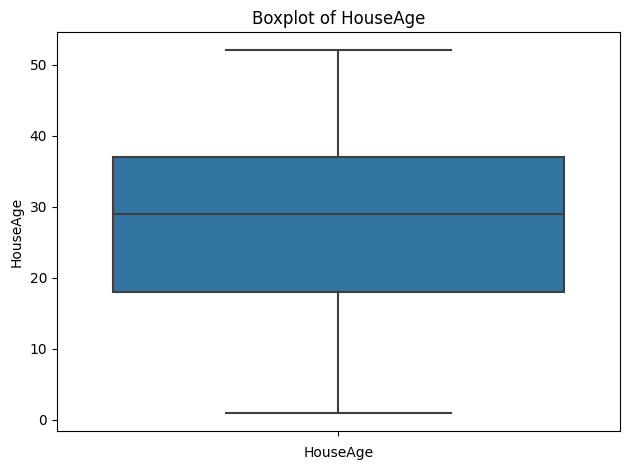

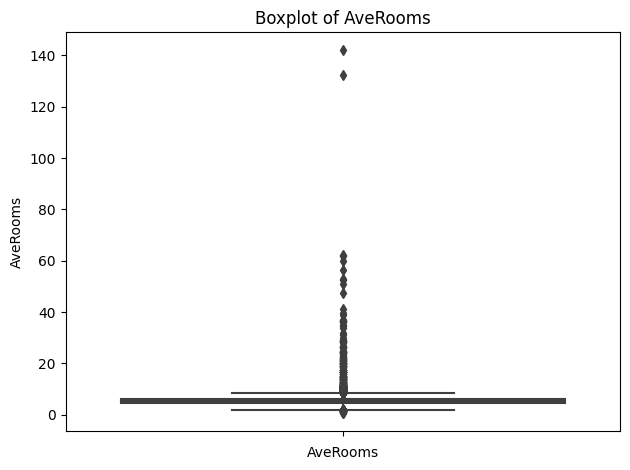

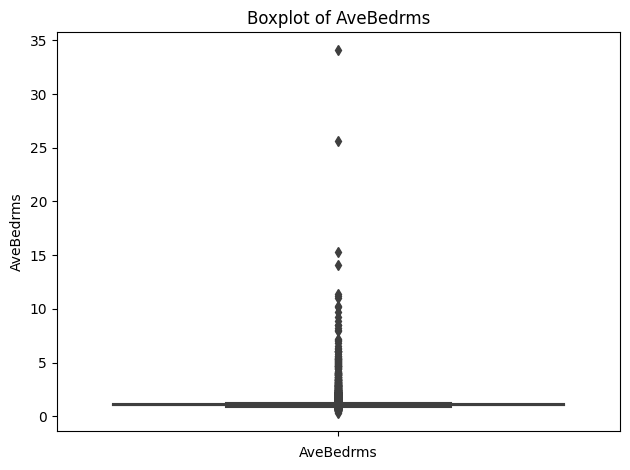

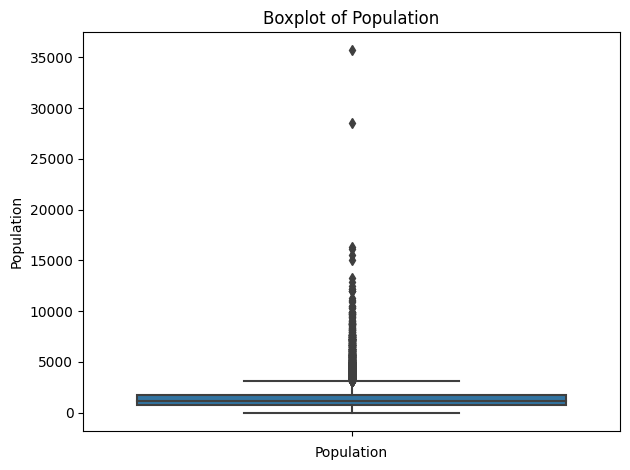

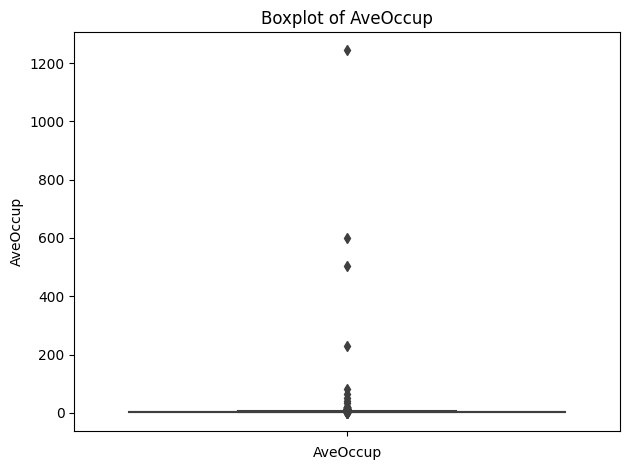

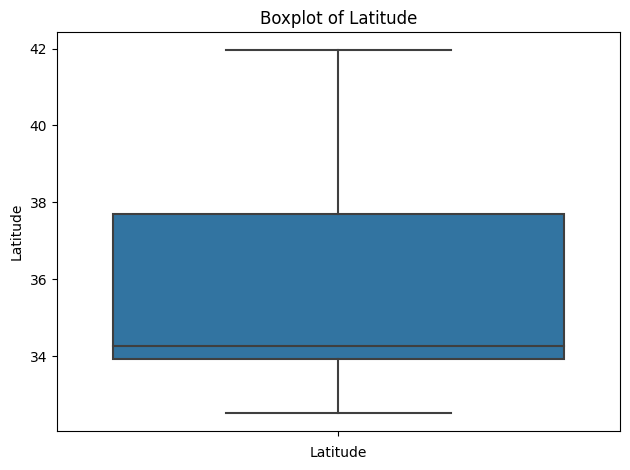

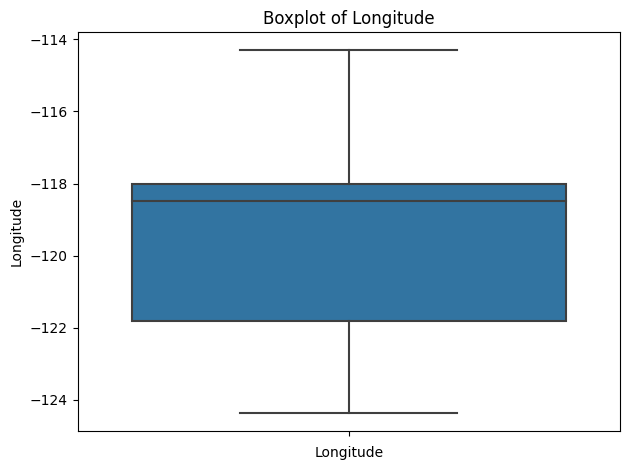

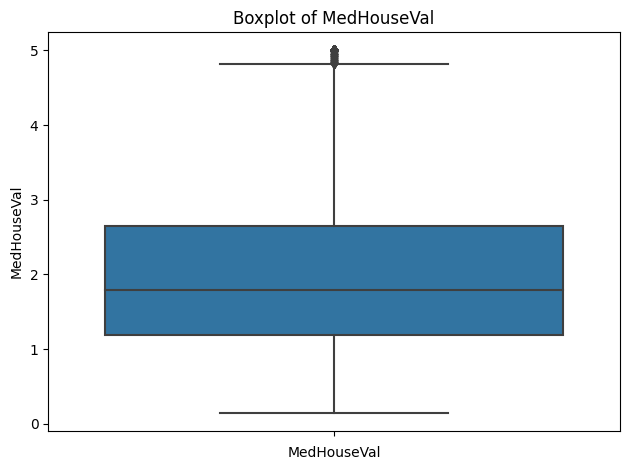

In [ ]:
#각 변수의 분포를 boxplot으로 살펴본 후, 어떤 것을 이상치로 분류할지 파악하자.
for a in df.columns:
    sns.boxplot(data=df, y=a)
    plt.title(f'Boxplot of {a}')
    plt.xlabel(a)
    plt.tight_layout()
    plt.show()

boxplot을 봤을 때, 이상치로 처리할 데이터가 명확하게 구분되지는 않는다. 따라서 IQR 기반 이상치 탐지 방식을 사용해 이상치 구분의 타당성을 높이고자 한다.

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


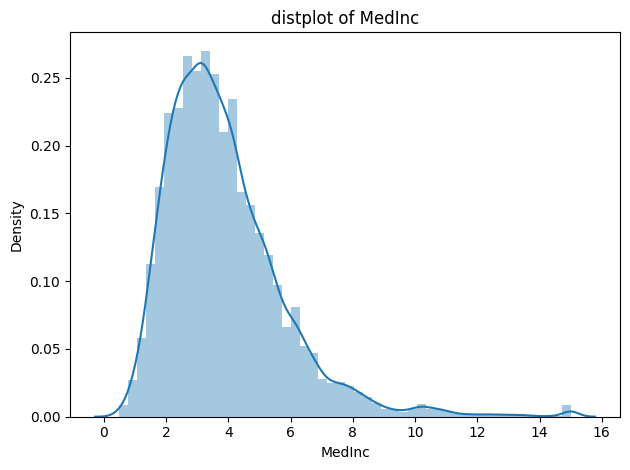

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


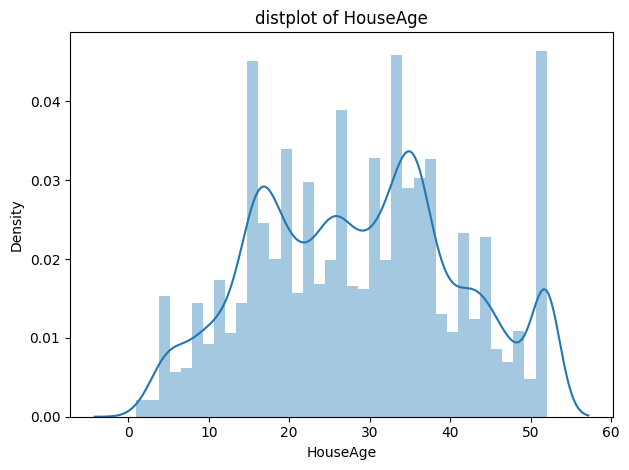

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


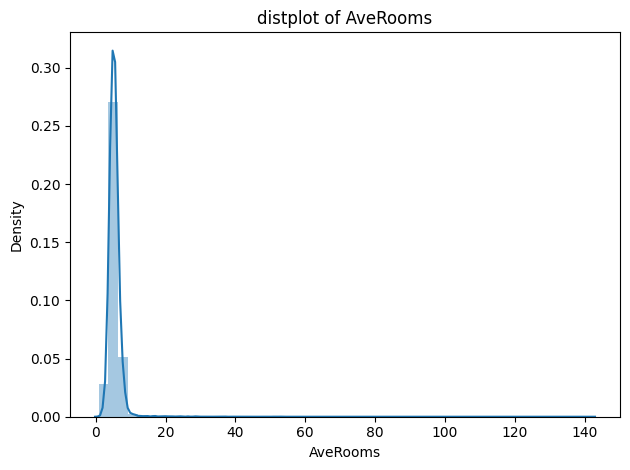

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


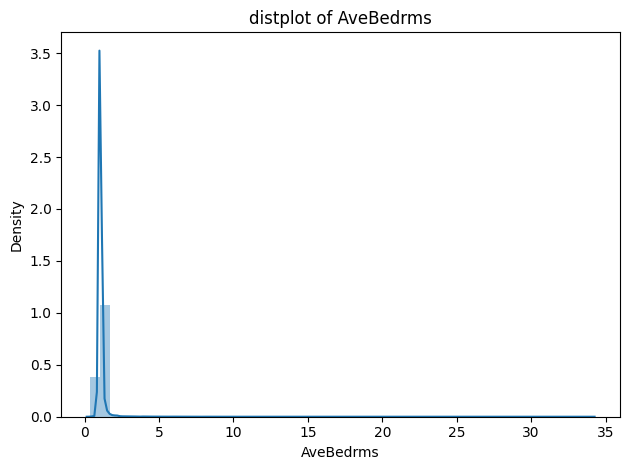

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


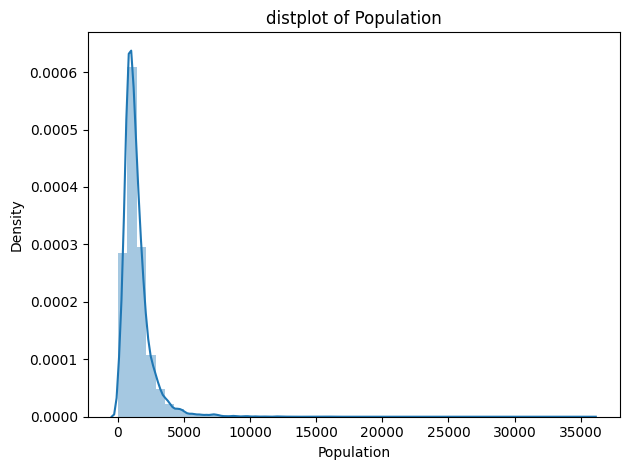

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


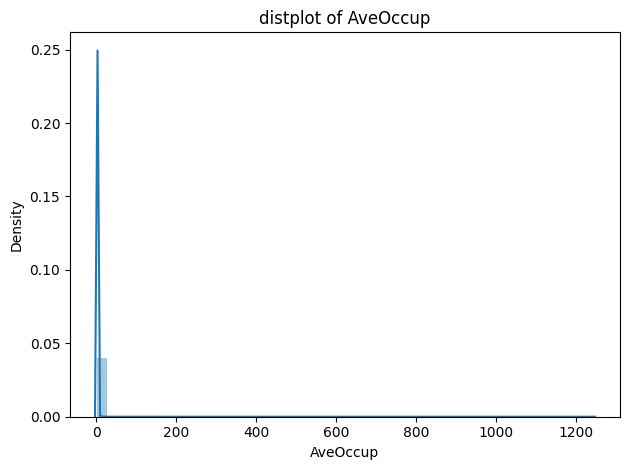

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


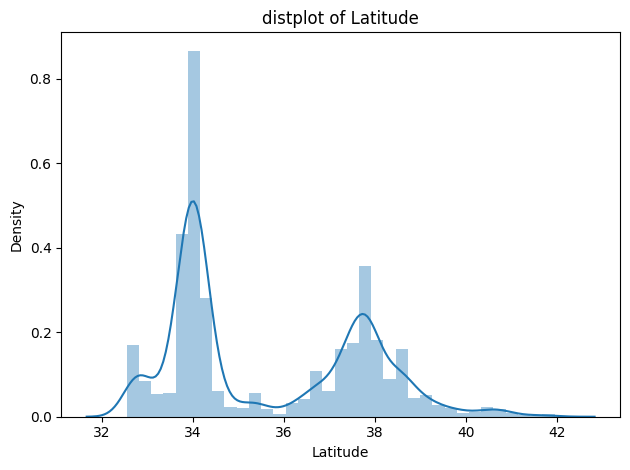

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


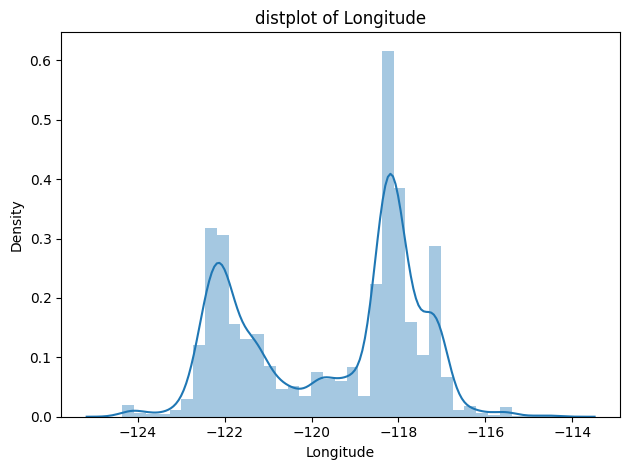

<ipython-input-23-7efe9a701bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


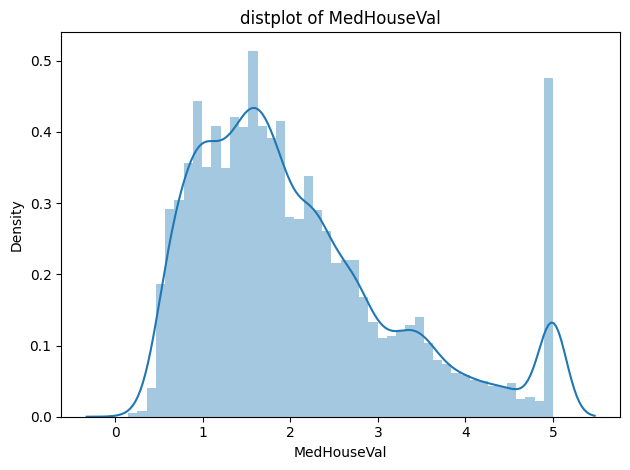

In [ ]:
#각 변수의 분포를 살펴보자
for a in df.columns:
    sns.distplot(df[a])
    plt.title(f'distplot of {a}')
    plt.xlabel(a)
    plt.tight_layout()
    plt.show()

In [ ]:
q3 = df.quantile(0.75)
q1 = df.quantile(0.25)
iqr = q3 - q1
print(iqr)

MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64


In [ ]:
len(df)

20640

In [ ]:
df_nooutlier = df[~((df < q1 - 1.5*iqr) | (df > q3 + 1.5*iqr))]  #outlier는 NaN으로 표시된다.
df_nooutlier = df_nooutlier.dropna()  #NaN으로 표시된 outlier가 있는 행을 제거
df_nooutlier.reset_index(drop=True, inplace=True)
df_nooutlier

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
2,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
3,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
4,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
16307,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
16308,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
16309,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
16310,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


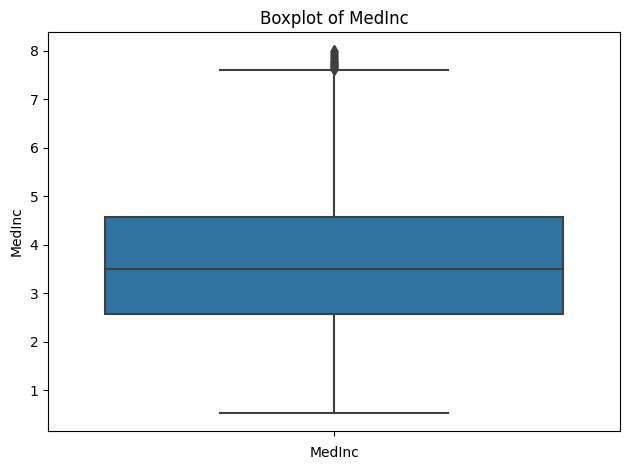

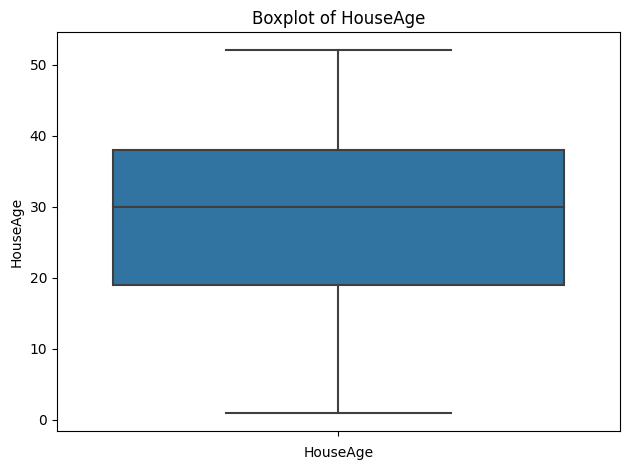

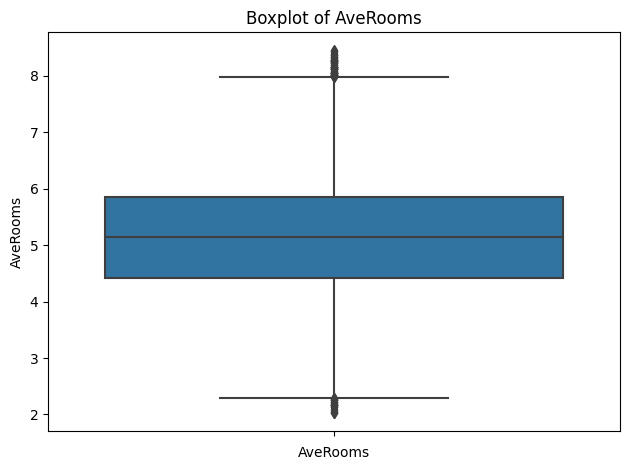

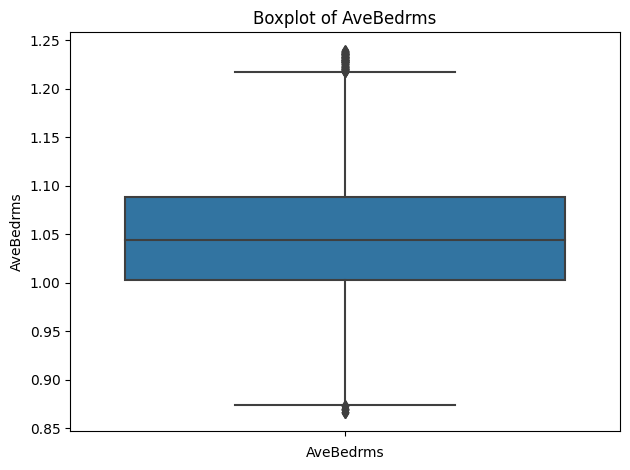

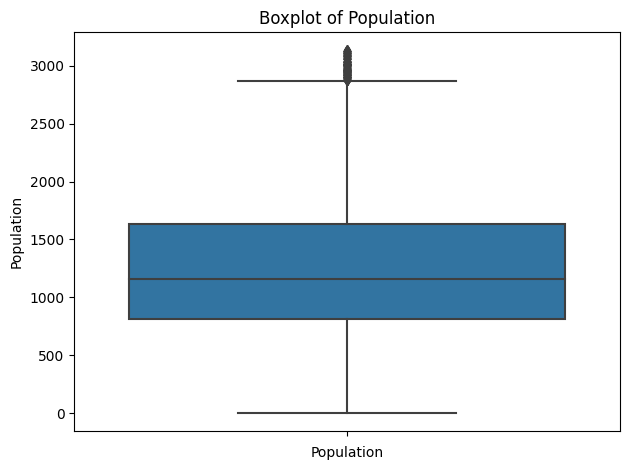

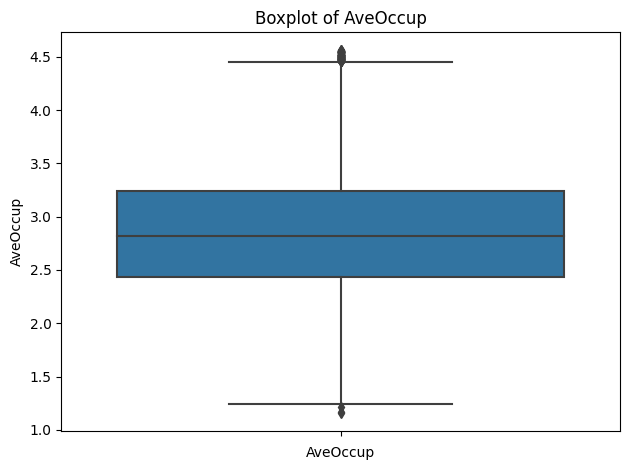

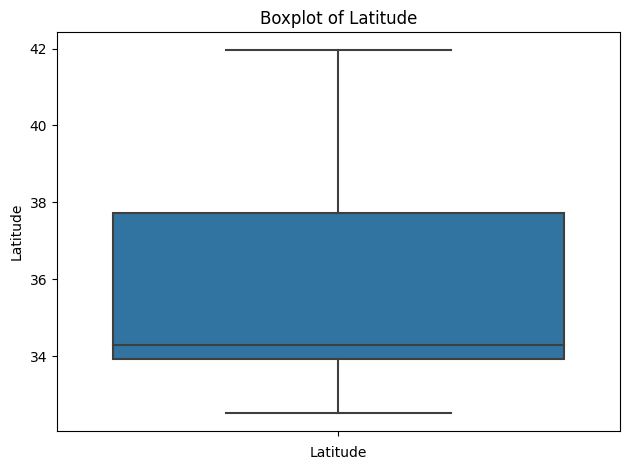

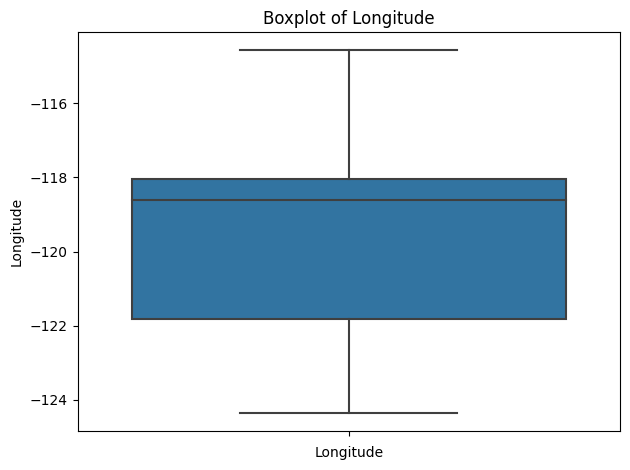

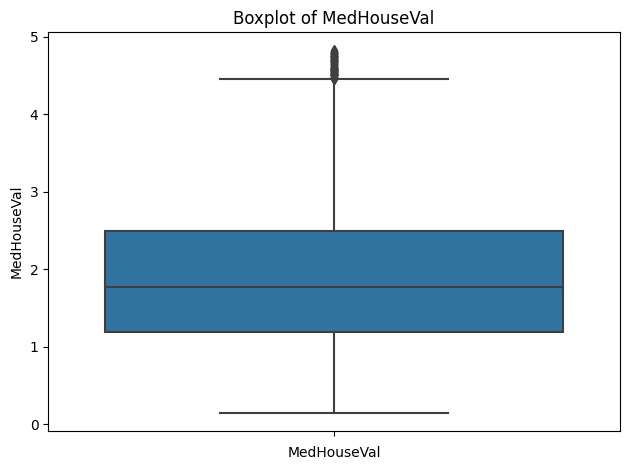

In [ ]:
#이상치가 제거된 후의 변수에 대한 boxplot을 살펴보자
for a in df.columns:
    sns.boxplot(data=df_nooutlier, y=a)
    plt.title(f'Boxplot of {a}')
    plt.xlabel(a)
    plt.tight_layout()
    plt.show()

이전에 비해 훨씬 깔끔한 boxplot이 그려졌다!

#데이터 표준화

각 칼럼별로 단위가 다르므로, StandardScaler를 사용하여 데이터를 평균이 0, 분산이 1에 가까운 정규분포로 변환시키자.

In [ ]:
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(df_nooutlier), columns=df_nooutlier.columns)
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.491677,1.849490,3.001399,0.393891,-1.236573,-0.100659,1.017985,-1.309756,1.688298
1,1.374203,1.849490,0.633741,0.388078,-1.137747,-0.507620,1.017985,-1.314768,1.573878
2,0.130327,1.849490,1.078856,0.508584,-1.126589,-1.094067,1.017985,-1.314768,1.583413
3,0.262267,1.849490,-0.377889,0.847278,-1.368872,-1.160590,1.017985,-1.314768,0.815313
4,0.000810,1.849490,-0.214746,-1.440116,-0.283381,-1.178979,1.013313,-1.314768,1.127850
...,...,...,...,...,...,...,...,...,...
16307,0.037775,-0.118677,1.555319,1.517712,-0.367861,0.257636,1.681364,-0.968918,-0.804583
16308,-1.452052,-0.364698,-0.105938,1.293540,-0.680279,-0.487359,1.779470,-0.733338,-1.214589
16309,-1.355347,-1.020753,0.047468,1.094629,-0.422056,-0.863366,1.756111,-0.798499,-1.064148
16310,-1.239605,-0.938746,0.166264,1.873203,-0.846051,-1.187293,1.756111,-0.848622,-1.144666


#상관관계

In [ ]:
corr = scaled_df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.181014,0.698658,-0.256522,-0.002466,-0.031503,-0.078629,-0.009936,0.632971
HouseAge,-0.181014,1.000000,-0.209684,-0.071658,-0.272499,-0.005069,0.004834,-0.088993,0.087911
AveRooms,0.698658,-0.209684,1.000000,-0.001579,-0.067882,0.057669,0.131869,-0.092256,0.260237
AveBedrms,-0.256522,-0.071658,-0.001579,1.000000,0.082117,-0.085343,0.034775,-0.004277,-0.099079
Population,-0.002466,-0.272499,-0.067882,0.082117,1.000000,0.209546,-0.113037,0.104769,-0.005995
AveOccup,-0.031503,-0.005069,0.057669,-0.085343,0.209546,1.000000,-0.166071,0.186429,-0.275504
Latitude,-0.078629,0.004834,0.131869,0.034775,-0.113037,-0.166071,1.000000,-0.933286,-0.150479
Longitude,-0.009936,-0.088993,-0.092256,-0.004277,0.104769,0.186429,-0.933286,1.000000,-0.043103
MedHouseVal,0.632971,0.087911,0.260237,-0.099079,-0.005995,-0.275504,-0.150479,-0.043103,1.000000


In [ ]:
fig = px.imshow(corr, text_auto=True)
fig.show()

- MedHouseVal, MedInc: 양의 상관관계(0.633)
- Latitude, Longitude 강한 음의 상관관계(-0.933)
- MedInc, AveRooms 양의 상관관계(0.699)


In [ ]:
fig = px.scatter(x='MedInc', y='MedHouseVal', data_frame=scaled_df)
fig.show()

In [ ]:
fig = px.scatter(x='Latitude', y='Longitude', data_frame=scaled_df)
fig.show()

In [ ]:
fig = px.scatter(x='MedInc', y='AveRooms', data_frame=scaled_df)
fig.show()